First we will fetch the data from the StatLib website:

In [1]:
import os
import tarfile
from six.moves import urllib
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH="datasets/housing"
HOUSING_URL=DOWNLOAD_ROOT+HOUSING_PATH+"/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

Now having defined the fetching function, we can call it to extract the datafile in .csv

In [2]:
fetch_housing_data(HOUSING_URL,HOUSING_PATH)

Now load the data using pandas.

In [3]:
import pandas as pd
import numpy as np

csv_path=os.path.join(HOUSING_PATH,"housing.csv")
housing = pd.read_csv(csv_path)

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Here we can observe that the total_bedrooms have 207 Null Values and ocean_proximity is a object ie string value and not a float value like other features

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Some things to notice:
The only data missing is the total_bedrooms, which here are 207 data points missing
ocean proximity is a feature defined as an "object" but we are safe to assume that it is a string, indicating a location in reference to the ocean. (Categorical feature) Every other feature is a float value.
With that in mind, we want to look at what categories exist for the ocean proximity. We can also plot histogram to look more carefully at the statistical values of each features as shown above.

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

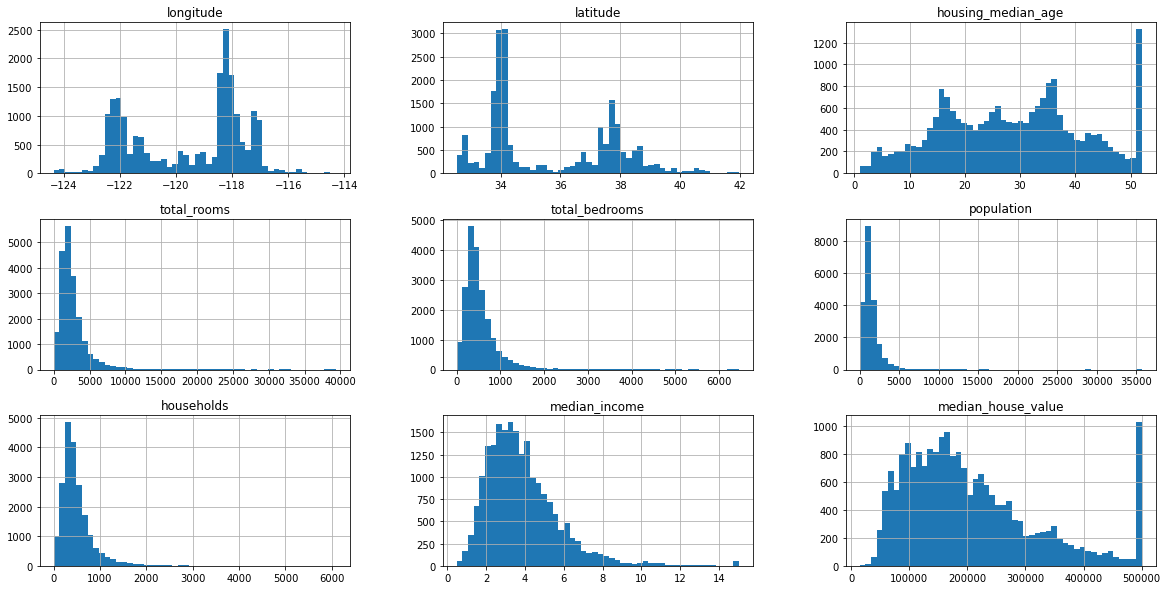

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,10))
plt.show()

E:\anaconda_juyp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda_juyp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda_juyp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

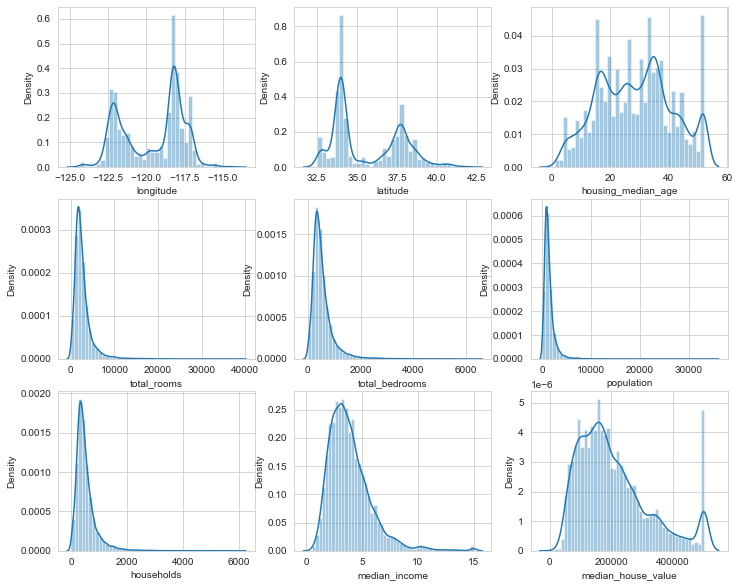

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize = [12, 10])
plt.subplot(331)
sns.distplot(housing['longitude'])
plt.subplot(332)
sns.distplot(housing['latitude'])
plt.subplot(333)
sns.distplot(housing['housing_median_age'])
plt.subplot(334)
sns.distplot(housing['total_rooms'])
plt.subplot(335)
sns.distplot(housing['total_bedrooms'].dropna())
plt.subplot(336)
sns.distplot(housing['population'])
plt.subplot(337)
sns.distplot(housing['households'])
plt.subplot(338)
sns.distplot(housing['median_income'])
plt.subplot(339)
sns.distplot(housing['median_house_value'])
plt.show()

#### We notice a few things about the data given the graphs:

    1. Housing value and Housing age are capped to a certain max.
    2. Median Income is definitely not in dollars (perhaps in 10000s instead).
    3. A lot of data are tail heavy.
    4. There's not much to be looking at longitudes and latitudes.
    
Now we can  strat testing for a model. But first we have to split the data into a training set and a test set.

<AxesSubplot:>

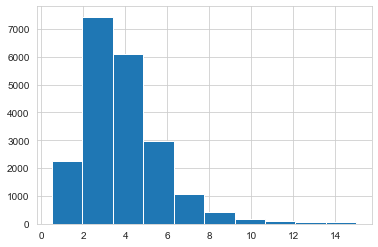

In [10]:
housing['median_income'].hist()

In [11]:
#dividing the income category to limit the number of income category
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
#putting everything above 5th category as 5th category
housing['income_cat'].where(housing['income_cat'] < 5, other = 5.0, inplace = True)

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 29)
for train_index, test_index in stratified_split.split(housing, housing['income_cat']):
     strat_train_set = housing.iloc[train_index]
     strat_test_set = housing.iloc[test_index]

In [14]:
housing['income_cat'].value_counts() / len(housing) * 100

3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: income_cat, dtype: float64

In [15]:
 strat_test_set['income_cat'].value_counts() / len( strat_test_set) * 100

3.0    35.053295
2.0    31.879845
4.0    17.635659
5.0    11.458333
1.0     3.972868
Name: income_cat, dtype: float64

In [16]:
 strat_train_set['income_cat'].value_counts() / len( strat_train_set) *100


3.0    35.059351
2.0    31.885901
4.0    17.629603
5.0    11.440165
1.0     3.984981
Name: income_cat, dtype: float64

As we can see here the percentage proportion in all these sets are same and thus are are stratifiedly splitted and not ranfomly

Now we want the data in its original form ie to remove income category as we added the bucket to divide the train and test in equal proportion of income categories

In [17]:
#dropping the income categary
for items in ( strat_train_set,  strat_test_set):
    items.drop('income_cat', axis = 1, inplace = True)
#inplace makes changes then and there

E:\anaconda_juyp\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
 strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 7771 to 20194
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [19]:
 strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7771,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383,166200.0,<1H OCEAN
9352,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834,500001.0,NEAR BAY
18657,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777,263800.0,NEAR OCEAN
4873,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375,38800.0,<1H OCEAN
12350,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399,94800.0,INLAND


In [20]:
housing =  strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

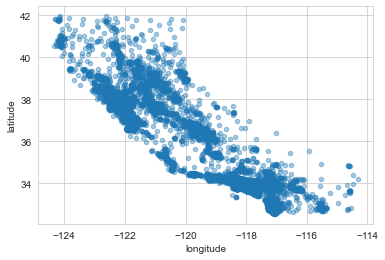

In [21]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4)

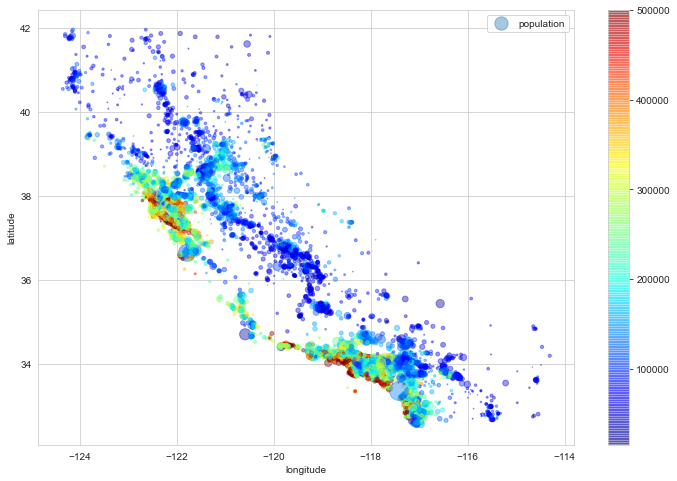

In [22]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s = housing['population'] / 100, label = 'population'
             ,c = housing['median_house_value'], cmap = plt.get_cmap('jet'), figsize = (12, 8), sharex = False)
plt.legend()

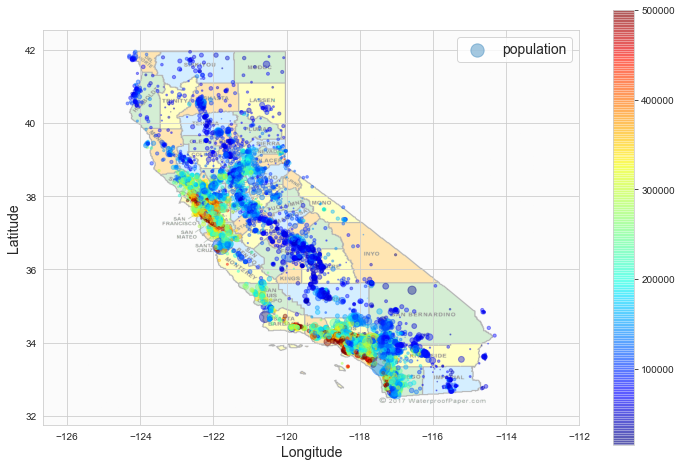

In [23]:
import matplotlib.image as mpimg
ax = housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s = housing['population'] / 100, label = 'population'
             ,c = housing['median_house_value'], cmap = plt.get_cmap('jet'), figsize = (12, 8), sharex = False)
#loading image
california_img = mpimg.imread('california_image.png')
plt.imshow(california_img, extent =[-126.65, -112, 31.75, 42.55] , cmap = plt.get_cmap('jet'), alpha = 0.5)
plt.xlabel('Longitude', fontsize = 14)
plt.ylabel('Latitude', fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

### Finding Corelations
Pearson's Distance Corelations

In [24]:
#pandas has corr method for finding corelation between features
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924722,-0.105995,0.040909,0.067200,0.094516,0.051637,-0.016472,-0.043780
latitude,-0.924722,1.000000,0.007958,-0.031951,-0.064306,-0.104614,-0.067934,-0.079775,-0.146422
housing_median_age,-0.105995,0.007958,1.000000,-0.361488,-0.319775,-0.293487,-0.301376,-0.112323,0.108483
total_rooms,0.040909,-0.031951,-0.361488,1.000000,0.930315,0.855548,0.918100,0.189669,0.127306
total_bedrooms,0.067200,-0.064306,-0.319775,0.930315,1.000000,0.877211,0.979905,-0.014001,0.043921
population,0.094516,-0.104614,-0.293487,0.855548,0.877211,1.000000,0.906144,-0.001476,-0.028341
households,0.051637,-0.067934,-0.301376,0.918100,0.979905,0.906144,1.000000,0.006599,0.060084
median_income,-0.016472,-0.079775,-0.112323,0.189669,-0.014001,-0.001476,0.006599,1.000000,0.691071
median_house_value,-0.043780,-0.146422,0.108483,0.127306,0.043921,-0.028341,0.060084,0.691071,1.000000


here we can see for eg total_rooms affecting median house values by 12%, the values which are negative are less corelated or
corelated in a reciprocative manner, if one is high other will be low

In [25]:
#focusing on median_house_values for corelation
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

here the median_income corelates by 69%
and housing_median_age corelates 10 %
also population does not corelates

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

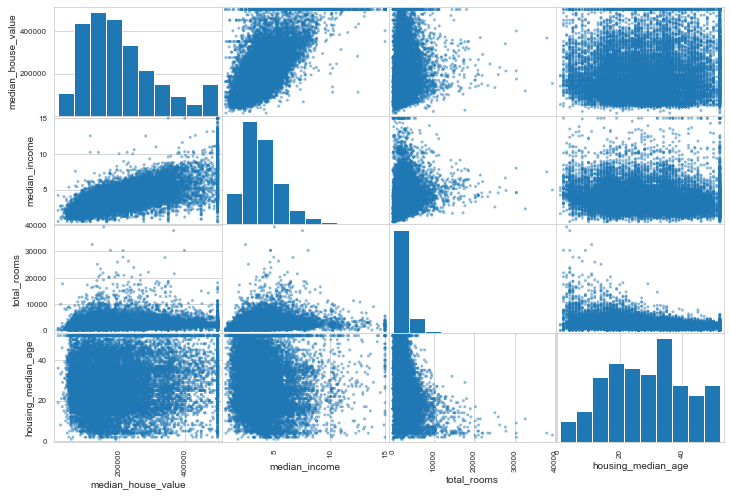

In [26]:
#Another approach is that we can use scatter plot to plot each or important features
#its drawback is that, for n number of features there will n^2 plots
#here by observing the correlation lets consider the first 4 as important attributes
imp_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
from pandas.plotting import scatter_matrix
scatter_matrix(housing[imp_attributes], figsize = (12, 8))

Here we can see that the median income is in increaing fashoin as the meadian_house value is increasing,
lets plot it out seprately

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

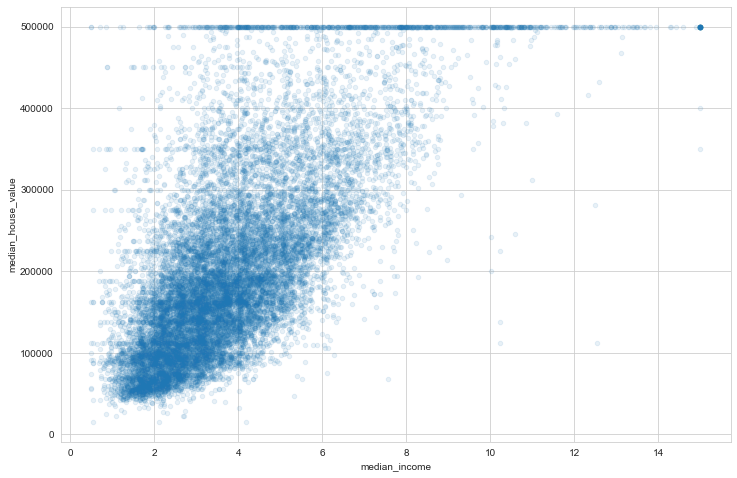

In [27]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', figsize = (12, 8), alpha = 0.1)

Here we can see the increaing fashion but the line in the top depicts our hypothesis consider the income greater than 5 in 
diffrent category

### Feature Enginneering
-> Coming up with ur own custom features. 
this is extroplation

In [28]:
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
housing['rooms_per_households'] = housing['total_rooms'] / housing['households']
housing['population_per_households'] = housing['population'] / housing['households']

In [29]:
corr_matrix = housing.corr()

In [30]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value           1.000000
median_income                0.691071
rooms_per_households         0.151804
total_rooms                  0.127306
housing_median_age           0.108483
households                   0.060084
total_bedrooms               0.043921
population_per_households   -0.021688
population                  -0.028341
longitude                   -0.043780
latitude                    -0.146422
bedrooms_per_rooms          -0.253572
Name: median_house_value, dtype: float64

**[observation]:** the 'bedrooms_per_rooms' are much corelated in a reciprocative way, hence the household having less bedroom/total_rooms ratio will be expensive

Next, just to get an idea, lets plot the rooms_per_households to median_house_value

(0.0, 6.0, 0.0, 550000.0)

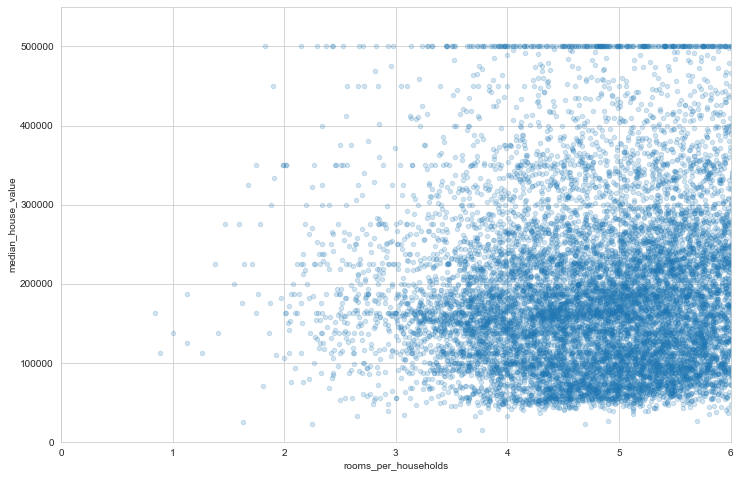

In [31]:
housing.plot(kind = 'scatter', x = 'rooms_per_households', y = 'median_house_value', figsize = (12, 8), alpha = 0.2)
plt.axis([0, 6, 0, 550000])

here we can see as the the rooms_per_household value increases the meadian_hpouse_values deacreases

In [32]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_rooms,rooms_per_households,population_per_households
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000
mean,-119.574691,35.642798,28.655220,2622.124879,535.192672,1418.447372,496.865492,3.870355,206418.759872,0.212973,5.434516,3.103875
std,2.005064,2.142773,12.535491,2171.310387,421.124910,1137.484934,382.194550,1.903633,115088.961605,0.058323,2.520743,11.603193
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.846154,0.692308
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,785.000000,279.000000,2.559725,119175.000000,0.175448,4.443478,2.433980
50%,-118.500000,34.260000,29.000000,2123.000000,433.000000,1159.000000,407.000000,3.532750,179650.000000,0.202964,5.230221,2.817596
75%,-118.010000,37.720000,37.000000,3121.250000,641.000000,1715.000000,599.000000,4.739375,264700.000000,0.239351,6.056361,3.273248
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,141.909091,1243.333333


just to get an idea about the min and max of new variables like rooms_per_households

# Preparing data for ML

As we have distrubed the dataset for our convinence, we have to again create a copy of stratified data excluding the median_house_values ie y_labels as we dont want our model to know the y_label before hand.

In [33]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_label = strat_train_set['median_house_value'].copy()

## Data Cleansing and handling missing values

In [34]:
# when calculating imputing value on its own
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
sample_incomplete_rows
median = housing['total_bedrooms'].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5654,-118.30,33.73,42.0,1731.0,433.0,866.0,403.0,2.7451,NEAR OCEAN
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,433.0,1063.0,428.0,3.7250,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,433.0,1169.0,400.0,3.5096,NEAR OCEAN
4767,-118.37,34.03,37.0,1236.0,433.0,966.0,292.0,3.0694,<1H OCEAN


This is a method without using sciket learn library

Now try with sciket learn library ->

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

housing_num = housing.drop('ocean_proximity', axis = 1) #axis = 1 means droping the whole column
imputer.fit(housing_num)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
7771,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383
9352,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834
18657,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777
4873,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375
12350,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399


In [36]:
#imputer basically imputes over all the attributes in the dataset, if ypu wann see these computation across all the attributes
#Use statistics_ method
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [37]:
#we can check this by finding median
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

Exactly same

using imputer we have created above, now transforming the trainig set by replacing the missing values by medians

In [38]:
X = imputer.transform(housing_num)

In [39]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [40]:
housing_tr[housing_tr.isnull().any(axis = 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


here we can see there are no missing values

## handling categorical values

here the categorical value is ocean proximity

In [41]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
18621    NEAR OCEAN
15543     <1H OCEAN
14129    NEAR OCEAN
18136     <1H OCEAN
14418    NEAR OCEAN
Name: ocean_proximity, dtype: object

there are two methods 
1. the scikitlearn methods like label encoders and one hot encoders
2. The factorize() method of pandas

Lets first try The factorize() method of pandas to convert it to categorical values

In [42]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [43]:
housing_cat_encoded[: 10]

array([0, 1, 2, 0, 3, 2, 0, 2, 0, 2], dtype=int64)

In [44]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

herer we can see <1h ocean is as 0, near bay as 1, and so on. thus categorising these 5 categories as 0,1,2,3,4

In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1, -1)) #this is a 1D array and 1hot encoder expects 2d array thus reshaping by (1, -1) as one row and one column
#using housing_cat_encoded instead of housing_cat as the onehotencoder needed label encoded values as strings cannot be used in onehotencoder

In [46]:
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [47]:
#since onehotencoder returns a sprase matrix need to cahnge it to dense array
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

### Custom Transformation

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
#For making and using our own alghorithm in ML we use the BaseEstimator. here the TransformerMixing is mandatory
#Both BaseEstimstor and TransformerMixin acts as arguments for our further classes for fit and transform method.

total_room_index, total_bedrooms_index, population_index, households_index = 3, 4, 5, 6 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self # Nothing to compute here
    
    def transform(self, X, y = None):
        rooms_per_household = X[:, total_room_index] / X[:, households_index]
        population_per_household = X[:, population_index] / X[:, households_index]
    
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, total_bedrooms_index] / X[:, total_room_index]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
# we call np.c_ with [] and not () as we are indexing through it

In [49]:
attributes_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attributes_adder.transform(housing.values)

In [50]:
housing_extra_attributes = pd.DataFrame(housing_extra_attributes, columns = list(housing.columns) +
                                        ['rooms_per_households',
                                         'populations_per_households'])

housing_extra_attributes.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,populations_per_households
0,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383,<1H OCEAN,4.658879,3.483645
1,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834,NEAR BAY,7.341826,3.076433
2,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777,NEAR OCEAN,4.941714,2.107429
3,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375,<1H OCEAN,2.927083,4.895833
4,-116.5,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399,INLAND,4.253593,2.608622


In [51]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
7771,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383
9352,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834
18657,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777
4873,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375
12350,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399
...,...,...,...,...,...,...,...,...
15219,-117.12,32.95,4.0,9018.0,1572.0,4438.0,1498.0,4.9880
2725,-115.55,32.79,22.0,565.0,162.0,692.0,141.0,1.2083
17949,-121.96,37.34,36.0,844.0,153.0,373.0,160.0,5.7910
2104,-119.77,36.75,44.0,1818.0,412.0,1680.0,418.0,1.7083


### Setting up pipelines for all the preprocessing

ML models don’t perform well when input features are in different scales. So, we will standardize the all the numeric features except for target variable.


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                       ('attributes_adder', CombinedAttributesAdder()),
                       ('std_scalar', StandardScaler()),   
])
housing_num_tr = num_pipeline.fit_transform(housing_num) #housing num is basicaly only numerical attributes ie without "OCEAN PROXIMITY"
housing_num_tr

array([[ 0.74049299, -0.80402818,  0.50616062, ..., -0.30771122,
         0.03273077, -0.05512278],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.75666902,
        -0.0023651 , -1.17763788],
       [-1.18967887,  0.61940394, -0.45115041, ..., -0.19550447,
        -0.08587951,  0.38012387],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ..., -0.06328319,
        -0.06658929, -0.48812906],
       [-0.09741107,  0.51673015,  1.22414389, ..., -0.43053438,
         0.07888273,  0.19240118],
       [ 0.17690276, -0.64535051, -1.00958184, ..., -0.32344572,
        -0.05235215,  0.40450624]])

now this is our X dataset (ALL NUMERICAL)

## Now  we also need to create a pipeline to split the numeric and categoric values and them=n compute the numeric attributes and categorical attributes difrentialy

thus using a base estimator to create a algorithm to diffrentiate the numerical attributes and categorical attributes

In [53]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names): #ie initializing (__init__) as attribute_names
        self.attribute_names = attribute_names
    
    def fit(self, X, y = None): # y = None as some time we may not have y_label thus 
        return self# no computation over here
    
    def transform(self, X, y = None):
        return X[self.attribute_names].values

In [54]:
num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline =Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

This is complete pipeline

 ## Now adding the both pipeline we will create unioun of pipelines

In [55]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

## now anytime if we have to try out a machine learning algorithm we dont have to prepare the data because sometime while trying out a algorithm we transform a bit of data which may affect another approach

In [56]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

In [57]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [58]:
#trying the full pipeline in diffrent training instances
some_data = housing.iloc[:5]
print(some_data)
some_label = housing_label.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7771     -118.09     33.92                35.0       1994.0           419.0   
9352     -122.57     37.96                52.0       3458.0           468.0   
18657    -121.96     36.97                23.0       4324.0          1034.0   
4873     -118.28     34.02                52.0        281.0           103.0   
12350    -116.50     33.81                26.0       5032.0          1229.0   

       population  households  median_income ocean_proximity  
7771       1491.0       428.0         3.7383       <1H OCEAN  
9352       1449.0       471.0         9.1834        NEAR BAY  
18657      1844.0       875.0         3.0777      NEAR OCEAN  
4873        470.0        96.0         1.9375       <1H OCEAN  
12350      3086.0      1183.0         2.5399          INLAND  


array([[ 7.40492994e-01, -8.04028185e-01,  5.06160621e-01,
        -2.89292541e-01, -2.74803365e-01,  6.37853068e-02,
        -1.80189846e-01, -6.93718958e-02, -3.07711220e-01,
         3.27307675e-02, -5.51227803e-02,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.49391785e+00,  1.08143600e+00,  1.86235125e+00,
         3.84975100e-01, -1.57900145e-01,  2.68606227e-02,
        -6.76782938e-02,  2.79108732e+00,  7.56669021e-01,
        -2.36509519e-03, -1.17763788e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-1.18967887e+00,  6.19403938e-01, -4.51150409e-01,
         7.83824675e-01,  1.19245134e+00,  3.74128485e-01,
         9.89406990e-01, -4.16403054e-01, -1.95504466e-01,
        -8.58795113e-02,  3.80123867e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 6.45730034e-01, -7.57358279e

In [59]:
some_data_prediction = linear_reg.predict(some_data_prepared)
print(f'Prediction = {some_data_prediction}')
print(f'Actual Value = {list(some_label)}')

Prediction = [209526.30110297 455497.76141409 252936.22210586 173615.33127943
 114294.56522481]
Actual Value = [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


In [60]:
from sklearn.metrics import mean_squared_error
housing_prediction = linear_reg.predict(housing_prepared)
m_s_e = mean_squared_error(housing_label, housing_prediction)
root_m_s_e = np.sqrt(m_s_e)
print(f'Root Mean Square Error = {root_m_s_e}')

Root Mean Square Error = 67949.91466225038


In [61]:
#now tring with decision tree regressor
from sklearn.tree import DecisionTreeRegressor
d_tree_reg = DecisionTreeRegressor()#(just_trying) not providing any paramater ie stoping command thus it will try to overfit
                                #the data making root error as 0
d_tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [62]:
housing_prediction = d_tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_prediction)
root_tree_mse = np.sqrt(tree_mse)
#print(f'Prediction Decision Tree Regresor = {housing_prediction}')
#print(f'Actual Value Decision Tree Regresor = {list(housing_label)}')
print(f'Root Mean Square Error Decision Tree Regresor = {root_tree_mse}')

Root Mean Square Error Decision Tree Regresor = 0.0


thus we can see that as no parameter was passed in DecisionTreeRegressor() the model is overfitted and error is 0

Something doesn’t look right as the model can’t be 100% accurate. Since, we don’t want to touch the test dataset until we find our final model, let’s use 10 fold cross validation technique to split the training set into further training and validation set.

# Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(d_tree_reg, housing_prepared, housing_label, cv = 10, scoring='neg_mean_squared_error') #neg_mean_squared_error are basicaly root mean squared error
tree_rmse_scores = np.sqrt(-scores)

In [64]:
def display(scores):    
    print('Scores', scores)
    print('Mean', scores.mean())
    print('Std Deviation', scores.std())
    
display(tree_rmse_scores)

Scores [69703.90284153 69652.90347511 67690.24336583 72450.48089888
 68821.55048606 68610.11021991 70505.28356753 70668.05437186
 67111.74465608 68703.80394918]
Mean 69391.80778319627
Std Deviation 1479.6382079028585


AS we can see our decison tree was overfitted we have high error about 69578 and a deviation of + or - 1038

In [65]:
#lets cross validate our linear Regressor
lin_scores = cross_val_score(linear_reg, housing_prepared, housing_label, cv = 10, scoring='neg_mean_squared_error')
lin_rmse = np.sqrt(-lin_scores)

def display(scores):
    print('Scores', scores)
    print('Mean', scores.mean())
    print('Std_Deviation', scores.std())
display(lin_rmse)

Scores [67641.22210761 69245.155892   65690.83401976 67581.651926
 66586.04760743 66937.30771561 67397.33645629 69807.64170261
 66660.63451034 74883.89423608]
Mean 68243.17261737354
Std_Deviation 2500.726216291982


Here the mean of error is about 68243 and the deviation is about + or - 2500
This may be due to, The Data set may not be perfectly Linearly Distributed

So, our linear regression is indeed better than decision tree for the problem we have as linear regression still has mean error of only $68,000 compare to $70,000 for decision trees.

## Random Forest

Random forest works by building multiple trees on random subset of features and averaging out their predictions.

In [66]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor(random_state=29)

random_reg.fit(housing_prepared, housing_label)
housing_prediction = random_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_label, housing_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18376.131616378087

Wow, this is great; it means model prediction error is just $18,603 on training sets. Will we get different result if we use cross validation on random forest?

In [68]:
forest_scores = cross_val_score(random_reg, housing_prepared, housing_label, cv = 10, scoring='neg_mean_squared_error')
forest_rmse = np.sqrt(-forest_scores)

def Display(scores):
    print('Scores', scores)
    print('Mean', scores.mean())
    print('Std Deviation', scores.std())
Display(forest_rmse)

Scores [48798.95593489 49442.05419015 47702.60343307 49006.05515985
 48866.29133602 49510.51518099 48803.37540831 49289.34574597
 48197.06938977 53088.34920448]
Mean 49270.46149834922
Std Deviation 1376.509849194807


Not bad, so far one of the best model with the error rate of $49,282 even though we see that error rate is pretty high in validation datasets compare to training sets suggesting there might be over fitting issue.Let’s try one last model before starting to fine tune our final model.

# Support Vector Machine (SVM):

In [69]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')
svm_reg.fit(housing_prepared, housing_label)
housing_prediction = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_label, housing_prediction)
svm_rmse = np.sqrt(svm_mse)
svm_rmse
print('Scores = ',svm_rmse)
print('Mean = ',svm_rmse.mean())
print('Std Deviation = ',svm_rmse.std())

Scores =  110277.58738008572
Mean =  110277.58738008572
Std Deviation =  0.0


RMSE of $110,277 rules Support Vector Machine from the final consideration.
(here the std_deviation is 0 as we have not calculated cross validation and thus there are no folds to calculate the deviation between the folds)

we can calculate std deviation by applying cross validation

In [70]:
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_label, cv = 10, scoring='neg_mean_squared_error')
svm_rmse = np.sqrt(-svm_scores)
display(svm_rmse)

Scores [109313.61154503 114529.84304212 110710.88959308 113511.20214198
 108438.75038532 110133.8348562  109331.63670062 110374.14311169
 109203.07012651 114176.92672787]
Mean 110972.39082304291
Std_Deviation 2132.908607387736


done with std deviation

## Fine Tuning Our Random Forest Regressor

We will fine tune our random forest model using grid search technique. Where we will need to tell which hyper parameters we want to experiment and what values to try out, and grid search technique will evaluate all the possible combination of hyper parameters values, using cross validation.

In [80]:
# using grid search to fine tune our model ie Random Forest
from sklearn.model_selection import GridSearchCV
params = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10] ,'max_features': [2, 4, 6, 8]},
]

rm_reg = RandomForestRegressor(random_state=29)
grid_search = GridSearchCV(rm_reg, params, cv=10, scoring= "neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_label)
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=29)

In [81]:
cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_scores), params)

62192.29376410018 {'max_features': 2, 'n_estimators': 3}
53944.199598652405 {'max_features': 2, 'n_estimators': 10}
51154.00003348023 {'max_features': 2, 'n_estimators': 30}
59827.894614101984 {'max_features': 4, 'n_estimators': 3}
51852.992329445704 {'max_features': 4, 'n_estimators': 10}
49364.0564252369 {'max_features': 4, 'n_estimators': 30}
58036.47451686248 {'max_features': 6, 'n_estimators': 3}
51179.008515775546 {'max_features': 6, 'n_estimators': 10}
49295.10216915952 {'max_features': 6, 'n_estimators': 30}
57218.218007115574 {'max_features': 8, 'n_estimators': 3}
51316.375975622046 {'max_features': 8, 'n_estimators': 10}
49213.54985330256 {'max_features': 8, 'n_estimators': 30}
59448.40627694516 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53095.81711013124 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58884.34490178927 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
50946.89030846043 {'bootstrap': False, 'max_features': 4, 'n_estimators

here we can see thee max features as 8 and n_estimators as 30 has the leat cost ie lest root mean square error thus they are the best parameters

We see that combination of 8 feature and 30 estimators gives the lowest RMSE of $49,213. When the problem and data in hand is massive, it is usually recommended to use randomized search rather than grid search like below.

In [82]:
#Randomized Hyperparameter search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distribs = {
    "n_estimators": randint(low=1, high=200),
    "max_features": randint(low=1, high=8)   
}

forst_reg = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(forst_reg, param_distributions=params_distribs, cv = 5, n_iter=10, random_state=42, scoring="neg_mean_squared_error")
random_search.fit(housing_prepared, housing_label)
cvres = random_search.cv_results_
for mean_scores, param in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_scores), params)

48544.00404844843 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
50995.96148946377 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
49903.493591097846 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
50315.980971258854 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
48679.429428150004 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
49911.08710915399 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
49733.26466939235 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
48917.30524187661 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
49514.30768478829 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
64935.80277348808 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}


For the purpose of this project, we will stay with grid search. Now, its time to analyze the best model and its error. Lets start by looking the importance of features in the random forest model.

## Evaluate the Model on the Test Set

Finally, its time to evaluate the random forest model on the test set and deploy it into production.

In [92]:
final_mode = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

prepared_X_test = full_pipeline.transform(X_test)
final_prediction = final_mode.predict(prepared_X_test)
final_mse = mean_squared_error(y_test, final_pediction)
final_rmse = np.sqrt(final_mse)
final_rmse

50750.75338430096

The RMSE of 50,750 is really good , so this is our final model and we will be deploying this random forest model into the production. Computing the prediction interval of model is always a good ideas as it makes us aware how much the error can fluctuate.

In [93]:
# Computing 95% confidence interval
from scipy import stats
confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([48411.72627291, 52986.62753398])

This tells us that prediction error can fluctuate anywhere between $ 48,411 to $ 52,986. Around $ 4,000 gap in confidence interval is something we can live with. So, this is our final model.